In [1]:
# started 04/07/22
from mxnet import np, npx, autograd
npx.set_np()

In [2]:
d = np.arange(20).reshape(4,5)
print(d)
# norms - > how big vertor is? L2 

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]


In [3]:
# example of gradient descent
x = np.arange(4)
# allocate memory for the gradient
x.attach_grad()
print(x.grad)
with autograd.record():
    y = 2 * np.dot(x, x)
y.backward() # calculate the gradient
print(x.grad)


[0. 0. 0. 0.]
[ 0.  4.  8. 12.]


In [4]:
#  joint, marginal, and conditional probability

# conditional probabilities 
# P(A|B) = P(B|A) * P(A) / P(B)
# marginal probability // Відособлений розподіл
# P(B) = SUM ( P(A|B) ) 

# Joint Probability: Probability of events A and B.
# Marginal Probability: Probability of event X=A given variable Y.
# Conditional Probability: Probability of event A given event B.

In [11]:
# analytical solution of loss function
# W = (XT X)-1 * XT * y (closed form / analytical solution )

# model the NN

In [64]:
from d2l import mxnet as d2l
from mxnet import autograd, gluon, np, npx
from mxnet.gluon import nn
from mxnet import init
from mxnet import gluon
npx.set_np()

In [65]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [66]:
def load_array(data_arrays, batch_size, is_train=True): #@save
    """Construct a Gluon data iterator."""
    dataset = gluon.data.ArrayDataset(*data_arrays)
    return gluon.data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [82]:
# model 
net = nn.Sequential()
net.add(nn.Dense(1))
# init W
net.initialize(init.Normal(sigma=0.01))
print(net)
# loss
loss = gluon.loss.L2Loss()
# SGD
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

Sequential(
  (0): Dense(-1 -> 1, linear)
)


In [86]:
# train
epoch = 3
for i in range(epoch):
    for data, label in data_iter:
        with autograd.record():
            l = loss(net(data), lable)
        l.backward()
        trainer.step(batch_size)
    print(f'epoch {epoch + 1}, loss {l.mean().asnumpy():f}')

epoch 4, loss 10.559337
epoch 4, loss 10.209307
epoch 4, loss 10.386932


In [87]:
w = net[0].weight.data()
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
b = net[0].bias.data()
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 2.032336  -3.4741907]
error in estimating b: [0.39942837]


In [91]:
# # soft max fucntion for classification 

In [25]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import gluon, init, npx
import mxnet as mx
import sys
from mxnet.gluon import nn
npx.set_np()
d2l.use_svg_display()

In [26]:
mnist_train = mx.gluon.data.vision.datasets.FashionMNIST(train=True)
mnist_test = mx.gluon.data.vision.datasets.FashionMNIST(train=False)

In [27]:
# `ToTensor` converts the image data from uint8 to 32-bit floating point. It
# divides all numbers by 255 so that all pixel values are between 0 and 1
transformer = gluon.data.vision.transforms.ToTensor() 

In [28]:
batch_size = 256
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer), batch_size=batch_size, shuffle=True, num_workers=8)
test_iter = gluon.data.DataLoader(mnist_test.transform_first(transformer), batch_size=batch_size, shuffle=False, num_workers=8)

In [29]:
for x, y in train_iter:
    print(x.shape, y.shape)
    break

(256, 1, 28, 28) (256,)


In [30]:
# dataset has 10 classes; each image has 28 * 28 pixels size, so we got the vecor of size 784
number_inputs = 784
number_outputs = 10
# set the NN model
net = nn.Sequential()
net.add(nn.Dense(10)) # 10 classes 
net.initialize(init.Normal(sigma=0.01)) # set weights with intial values

In [31]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

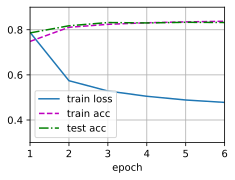

In [32]:
num_epochs = 6
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
# 4 | Multilayer Perceptrons
## Linear Models May Go Wrong - so hidden layers increase complexity
## With deep neural networks, we used observational data to jointly learn both a representation via hidden 
## layers and a linear predictor that acts upon that representation.

## Incorporating Hidden Layers